In [ ]:
#데이터 다운받기
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

170508288/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


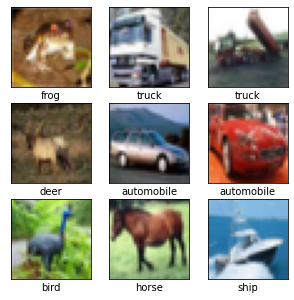

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)
class_names=['airplance','automobile','bird','cat','deer','dog','frog','horse','ship',
            'truck']
sample_size=9
random_idx=np.random.randint(50000,size=sample_size)
plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap='gray')
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

In [ ]:
#전처리
x_mean=np.mean(x_train,axis=(0,1,2)) #채널별로 평균산출
x_std=np.std(x_train,axis=(0,1,2)) #채널별로 표준편차 산출

x_train=(x_train-x_mean)/x_std #표준값
x_test=(x_test-x_mean)/x_std

from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3,
                                            random_state=777)
print(x_train.shape,len(y_train))
print(x_test.shape,len(y_test))

(35000, 32, 32, 3) 35000
(10000, 32, 32, 3) 10000


In [ ]:
#모델 구성하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from tensorflow.keras.optimizers import Adam
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=3, padding='same',activation='relu',
                input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=3, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2,padding='same'))
model.add(Conv2D(filters=64,kernel_size=3, padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2,padding='same'))
model.add(Conv2D(filters=128,kernel_size=3, padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2,padding='same'))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer=Adam(1e-4),loss='sparse_categorical_crossentropy',metrics=['acc'])
history=model.fit(x_train,y_train,epochs=30,batch_size=32, validation_data=(x_val,y_val))

Epoch 1/30
1094/1094 [==============================] - 47s 16ms/step - loss: 1.6282 - acc: 0.4142 - val_loss: 1.3771 - val_acc: 0.4995
Epoch 2/30
1094/1094 [==============================] - 17s 15ms/step - loss: 1.2931 - acc: 0.5425 - val_loss: 1.2764 - val_acc: 0.5428
Epoch 3/30
1094/1094 [==============================] - 17s 15ms/step - loss: 1.1230 - acc: 0.6064 - val_loss: 1.0745 - val_acc: 0.6187
Epoch 4/30
1094/1094 [==============================] - 16s 15ms/step - loss: 0.9951 - acc: 0.6537 - val_loss: 0.9999 - val_acc: 0.6528
Epoch 5/30
1094/1094 [==============================] - 17s 15ms/step - loss: 0.8872 - acc: 0.6938 - val_loss: 0.9757 - val_acc: 0.6615
Epoch 6/30
1094/1094 [==============================] - 16s 15ms/step - loss: 0.7963 - acc: 0.7239 - val_loss: 0.9335 - val_acc: 0.6755
Epoch 7/30
1094/1094 [==============================] - 16s 15ms/step - loss: 0.7154 - acc: 0.7520 - val_loss: 0.9000 - val_acc: 0.6861
Epoch 8/30
1094/1094 [==========================

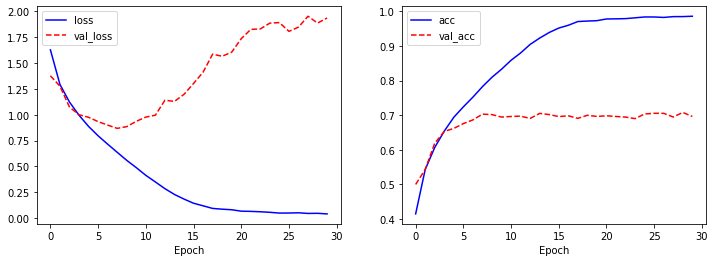

In [ ]:
#모델평가 그래프 작성하기
import matplotlib.pyplot as plt
hist_dict=history.history
loss=hist_dict['loss']
val_loss=hist_dict['val_loss']
acc=hist_dict['acc']
val_acc=hist_dict['val_acc']

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(loss,'b-',label='loss')
plt.plot(val_loss,'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(acc,'b-',label='acc')
plt.plot(val_acc,'r--',label='val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

각 신경망 별로 시각화하기

In [ ]:
import tensorflow as tf
get_layer_name = [layer.name for layer in model.layers] #각 층의 이름
get_output=[layer.output for layer in model.layers]

#모델 전체에서 output을 가져올 수 있습니다
visual_model=tf.keras.models.Model(inputs=model.input, outputs=get_output)
#테스트셋의 두번째 데이터는 '배'입니다
#np.expand_dims: 차수증가

test_img=np.expand_dims(x_test[1],axis=0) #이미지 파일1개
feature_maps=visual_model.predict(test_img) #예측값

for layer_name, feature_map in zip(get_layer_name, feature_maps):
  #Dense 층은 제외합니다
  if(len(feature_map.shape)==4):
    img_size=feature_map.shape[1]
    features=feature_map.shape[-1]
    #(img_size,img_size)의 feature_map이 features개수만큼 존재합니다
    display_grid=np.zeros((img_size,img_size*features))
    #각 특징맵을 display_grid 배열에 이어붙입니다
    for i in range(features):
      x=feature_map[0,:,:,i]
      x-=x.mean()
      x/=x.std()
      x*=64; x+=128
      #np.clip(x,min,max): x데이터에서 min보다 작은값은 min, max보다 큰값은 max로 변환
      #uint8: 부호없는 8비트 정수형. 0~255까지 값만 저장
      x=np.clip(x,0,255).astype('uint8')
      display_grid[:,i*img_size:(i+1)*img_size]=x
      plt.figure(figsize=(feature,2+1./features))
      plt.title(layer_name,fontsize=20)
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto',cmap='viridis')

feature_maps
            
            

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
x_test[1].shape

(32, 32, 3)

In [ ]:
test_img.shape

(1, 32, 32, 3)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 128)        